In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/mall-customers-segmentation/Mall_Customers.csv")
X = df.iloc[:,[3,4]].values
y = df.iloc[:, -1].values

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

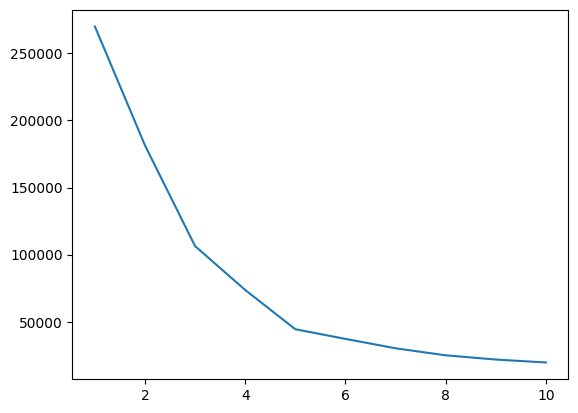

In [3]:
from sklearn.cluster import KMeans
WCSS = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

plt.plot(range(1,11), WCSS)

In [4]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++',n_init=20, max_iter=500, random_state=42)
y_means = kmeans.fit_predict(X)

y_means

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

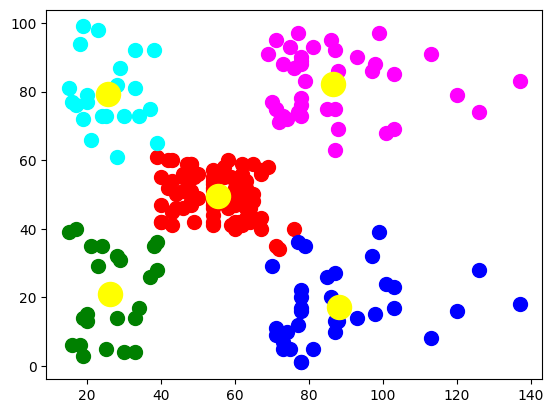

In [5]:
plt.scatter(X[y_means == 0,0], X[y_means == 0,1], s = 100, c='red', label='cluster 1')
plt.scatter(X[y_means == 1,0], X[y_means == 1,1], s = 100, c='blue', label='cluster 2')
plt.scatter(X[y_means == 2,0], X[y_means == 2,1], s = 100, c='green', label='cluster 3')
plt.scatter(X[y_means == 3,0], X[y_means == 3,1], s = 100, c='cyan', label='cluster 4')
plt.scatter(X[y_means == 4,0], X[y_means == 4,1], s = 100, c='magenta', label='cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

1. X contains the original data points with their two features (x and y coordinates).

2. y_means (or sometimes kmeans.labels_) contains the predicted cluster assignments for each point in X.

In [6]:
from sklearn.metrics import silhouette_score

silhouette_score(X, y_means)

0.553931997444648